<a href="https://colab.research.google.com/github/AriadnaVazquez/Metodos-Numericos-I/blob/main/Polinomio%20Interpolante%20de%20Newton%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def newton_interpolation(x_values, y_values):
    """
    Calcular el polinomio de interpolación de Newton.

    Parámetros:
        x_values (list): Valores de x de la tabla.
        y_values (list): Valores de y de la tabla.

    Retorna:
        sympy.Expr: Polinomio de interpolación simbólico.
    """
    x = sp.symbols('x')  # Variable simbólica
    n = len(x_values)  # Número de puntos
    diff_table = y_values[:]  # Inicializar tabla de diferencias
    polynomial = 0  # Polinomio inicial
    term = 1  # Término acumulativo para el polinomio

    # Construir el polinomio
    for i in range(n):
        polynomial += diff_table[0] * term
        term *= (x - x_values[i])  # Actualizar el término acumulativo
        diff_table = [(diff_table[j + 1] - diff_table[j]) / (x_values[j + i + 1] - x_values[j]) for j in range(len(diff_table) - 1)]

    return sp.simplify(polynomial)

In [4]:
def plot_interpolation(x_values, y_values, newton_poly):
    """
    Graficar el polinomio de interpolación junto con los datos originales.

    Parámetros:
        x_values (list): Valores de x.
        y_values (list): Valores de y.
        newton_poly (sympy.Expr): Polinomio interpolante.
    """
    x = sp.symbols('x')
    poly_func = sp.lambdify(x, newton_poly, 'numpy')  # Convertir a función numérica
    x_plot = np.linspace(min(x_values), max(x_values), 500)
    y_plot = poly_func(x_plot)

    # Graficar
    plt.scatter(x_values, y_values, color='red', label='Datos originales')
    plt.plot(x_plot, y_plot, color='blue', label='Polinomio de interpolación')
    plt.title('Interpolación de Newton')
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.legend()
    plt.grid(True)
    plt.show()

Polinomio de interpolación:
                  3        2                           
1.66666666666667⋅x  - 6.5⋅x  + 5.83333333333333⋅x + 1.0


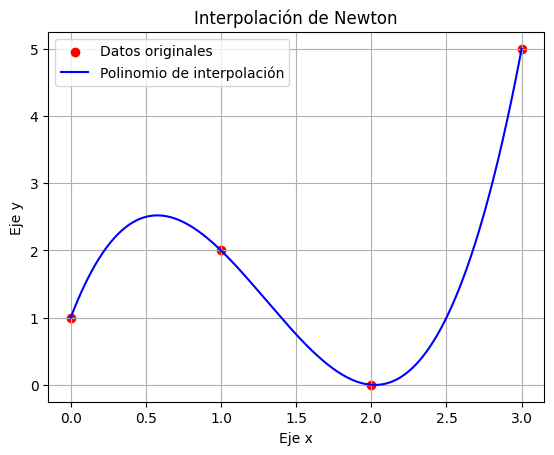

In [5]:
# Ejemplo de uso
x_values = [0, 1, 2, 3]
y_values = [1, 2, 0, 5]

newton_poly = newton_interpolation(x_values, y_values)

print("Polinomio de interpolación:")
sp.pprint(newton_poly)

plot_interpolation(x_values, y_values, newton_poly)